In [59]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, f_regression, mutual_info_regression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, accuracy_score
from imblearn.combine import SMOTETomek
import seaborn as sns

In [2]:
file = r'dataset/Speed Dating Data.csv'
data = pd.read_csv(file, encoding='utf-8')

In [3]:
cols = pd.read_csv("cols.txt")['colname'].tolist()

In [4]:
data_df = data[cols].copy()
data_df.dropna(axis=0,inplace=True)
data_df.reset_index(inplace=True, drop=True)

In [5]:
# check if there are neg values
for i in range(len(data_df.index)):
    for col in cols:
        if data_df.at[i, col] < 0 and col != "int_corr":
            print(i, col)

# Polynomial Features, Feature Selection, MinMaxScaler

In [6]:
X = data_df.drop(['match'],1)
y = data_df['match']  

selector = SelectKBest(score_func= mutual_info_classif, k=31)
selector.fit(X, y)
x_scores = selector.scores_  
mask = selector.get_support(indices=True)
headers = X.columns
headers_new = headers[mask]
X_features = X[headers_new]
X = pd.DataFrame(X_features)
# data_df_features['Response'] = y
data_df_features_scores = pd.DataFrame(x_scores, index=headers, columns=['Scores'])
data_df_features_scores.sort_values(by =['Scores'], ascending=False, inplace=True)
print(data_df_features_scores.head(10))
data_df_features_scores[0:10].to_csv(r'./images/features_original.txt', index=True)

            Scores
dec_o     0.172112
attr_o    0.039947
museums   0.010490
int_corr  0.010477
tv        0.010020
age_o     0.007520
art       0.006731
clubbing  0.006169
gaming    0.006153
shopping  0.005208


In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42, shuffle=True, train_size=0.7, stratify=y)

In [46]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
X_train = pd.DataFrame(X_train)
y_train.reset_index(inplace=True, drop=True)
X_train = pd.concat([X_train, y_train], axis = 1)
X_test = pd.DataFrame(X_test)
y_test.reset_index(inplace=True, drop=True)
X_test = pd.concat([X_test, y_test], axis = 1)

In [48]:
X_train.to_csv(r"./dataset/train.csv", index=False)
X_test.to_csv(r'./dataset/test.csv', index=False)

In [49]:
X_train.drop('match', axis=1, inplace=True)
X_test.drop('match', axis=1, inplace=True)

In [50]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42, n_jobs=-1)
X_smt, y_smt = smt.fit_resample(X_train, y_train)

In [51]:
X_smt = pd.DataFrame(X_smt)
y_smt = pd.DataFrame(y_smt)

In [52]:
print(X_smt.shape)

(8958, 50)


In [53]:
X_smt = pd.concat([X_smt, y_smt], axis =1)
X_test = pd.concat([X_test, y_test], axis=1)
X_smt.to_csv(r"./dataset/train_smote.csv", index=False)
X_test.to_csv(r'./dataset/test_smote.csv', index=False)

In [15]:
X = data_df.drop(['match'],1)
y = data_df['match']  

poly = PolynomialFeatures(3)
X = poly.fit_transform(X)
features_names = poly.get_feature_names()
X = pd.DataFrame(X, columns=features_names)

num_features = 50

selector = SelectKBest(score_func= mutual_info_classif, k=num_features)
selector.fit(X, y)
x_scores = selector.scores_  
mask = selector.get_support(indices=True)
headers = X.columns
headers_new = headers[mask]
X_features = X[headers_new]
X = pd.DataFrame(X_features)

data_df_features_scores = pd.DataFrame(x_scores, index=headers, columns=['Scores'])
data_df_features_scores.sort_values(by =['Scores'], ascending=False, inplace=True)
data_df_features_scores = data_df_features_scores[0:num_features]
print(data_df_features_scores)
data_df_features_scores[0:10].to_csv(r'./images/features_poly.txt', index=True)

              Scores
x4 x10 x23  0.183705
x4 x6 x9    0.182400
x4 x9 x28   0.180663
x4 x6 x23   0.180184
x4 x10 x22  0.178416
x4 x7 x15   0.177983
x4 x6 x15   0.176835
x4 x15 x30  0.176628
x4 x14 x27  0.176602
x4 x6 x13   0.176453
x3 x4 x6    0.176445
x3^2 x4     0.176400
x4 x7 x23   0.176280
x4 x6 x27   0.176207
x4 x13 x28  0.175953
x3 x4 x23   0.175907
x3 x4 x16   0.175665
x4 x23 x30  0.175616
x4 x9 x16   0.175380
x4 x15 x27  0.175159
x4 x7 x8    0.175127
x4 x11 x30  0.175065
x4 x22 x27  0.174979
x3 x4^2     0.174955
x4 x12 x27  0.174951
x4 x6 x11   0.174843
x4 x6 x12   0.174813
x4 x9 x22   0.174796
x4 x6 x14   0.174635
x4 x5 x28   0.174603
x4 x8 x30   0.174463
x3 x4 x11   0.174255
x4 x10 x27  0.174185
x4 x13 x16  0.174126
x4 x6^2     0.173934
x4 x15 x28  0.173896
x4 x7 x11   0.173825
x3 x4 x22   0.173813
x4 x22 x30  0.173734
x4 x7^2     0.173703
x4 x6 x7    0.173612
x4 x16 x22  0.173598
x4 x13 x20  0.173586
x3 x4 x8    0.173506
x4 x27 x30  0.173500
x4 x7 x18   0.173443
x4 x5 x10   0

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42, shuffle=True, train_size=0.7, stratify=y)

In [17]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train = pd.DataFrame(X_train)
y_train.reset_index(inplace=True, drop=True)
X_train = pd.concat([X_train, y_train], axis = 1)
X_test = pd.DataFrame(X_test)
y_test.reset_index(inplace=True, drop=True)
X_test = pd.concat([X_test, y_test], axis = 1)

In [19]:
X_train.to_csv(r"./dataset/train_poly.csv", index=False)
X_test.to_csv(r'./dataset/test_poly.csv', index=False)

In [64]:
features_original = pd.read_csv(r'./images/features_original.txt')
features_poly = pd.read_csv(r'./images/features_poly.txt')

features_original.rename(columns={'Unnamed: 0':'Index'}, inplace=True)
features_poly.rename(columns={'Unnamed: 0':'Index'}, inplace=True)

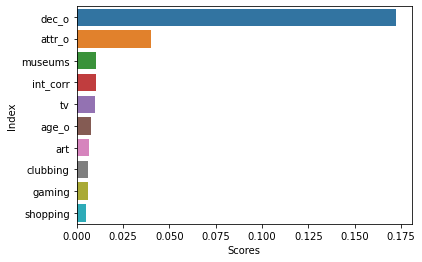

In [65]:
sns.barplot(x=features_original['Scores'], y=features_original['Index'])

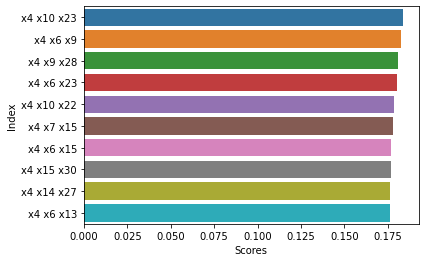

In [66]:
sns.barplot(x=features_poly['Scores'], y=features_poly['Index'])

# Use onehot encoding for field_cd

In [ ]:
cat_cols = ['gender', 'match', 'samerace', 'dec_o', 'imprelig', 'goal','date']
to_one_hot = ['field_cd']
to_normalize = ['int_corr', 'age_o',  'attr_o', 'age', 'go_out',
       'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking',
       'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts',
       'music', 'shopping', 'yoga', 'exphappy']

In [ ]:
df_to_normalize = data_df[to_normalize].copy()
df_to_one_hot = data_df[to_one_hot].copy()
df_categorical = data_df[cat_cols].copy()

In [8]:
minmax = MinMaxScaler((0,1)).fit(df_to_normalize)

df_to_normalize = minmax.transform(df_to_normalize)
df_to_normalize = pd.DataFrame(df_to_normalize)
df_to_normalize.columns = to_normalize



one_hot = OneHotEncoder().fit(df_to_one_hot)

df_to_one_hot = one_hot.transform(df_to_one_hot)
df_to_one_hot = pd.DataFrame(df_to_one_hot.toarray())
df_to_one_hot.columns = [ 'to_one_hot_' + str(x) for x in range(len(one_hot.categories_[0])) ]


result1_df = pd.concat([df_to_normalize, df_to_one_hot,df_categorical],axis = 1)


In [9]:
result1_df.columns

Index(['int_corr', 'age_o', 'attr_o', 'age', 'go_out', 'sports', 'tvsports',
       'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
       'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping',
       'yoga', 'exphappy', 'to_one_hot_0', 'to_one_hot_1', 'to_one_hot_2',
       'to_one_hot_3', 'to_one_hot_4', 'to_one_hot_5', 'to_one_hot_6',
       'to_one_hot_7', 'to_one_hot_8', 'to_one_hot_9', 'to_one_hot_10',
       'to_one_hot_11', 'to_one_hot_12', 'to_one_hot_13', 'to_one_hot_14',
       'to_one_hot_15', 'to_one_hot_16', 'to_one_hot_17', 'gender', 'match',
       'samerace', 'dec_o', 'imprelig', 'goal', 'date'],
      dtype='object')

In [10]:
result1_df.to_csv("./dataset/processed_onehot.csv", index=False)